<a href="https://colab.research.google.com/github/Tharindu1527/tharindu1527/blob/code/Sarcasm_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-02-29 15:01:26--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 142.251.175.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: 'sarcasm.json.2'

     0K .......... .......... .......... .......... ..........  0%  318K 17s
    50K .......... .......... .......... .......... ..........  1%  347K 16s
   100K .......... .......... .......... .......... ..........  2%  538K 14s
   150K .......... .......... .......... .......... ..........  3%  714K 12s
   200K .......... .......... .......... .......... ..........  4%  225K 14s
   250K .......... .......... .......... .......... ..........  5%  200K 16s
   300K .......... .......... .......... .......... ..........  6% 68.3K 25s
   350K .......... .......... ........

In [ ]:
import json

#load jason file
with open("./sarcasm.json",'r') as f:
    datastore = json.load(f)

#list
sentences=[]
labels = []

#collecting sentences and lables in to the list
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
#Hyper parameters

In [ ]:
#number of examples those are useing to training
training_size = 20000

#vocabulary size of the tokenizer
vocab_size = 10000

#Maxlen of the padded sequences
max_length = 32

#output dimensions of embedding layer
embedding_dim = 16

In [ ]:
#split the dataset
#that mean we already generate train and test datasets.now we have to devide it to sentences and labels lists
#thats why we use data split method

In [ ]:
#split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

#spit the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
#preprocessing the train and test sets

import  numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#paramneter for padding and oov tokens
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

#start tokenizer class
tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov_tok)

#generate the word index dictionaries
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

#generate and pad the training set
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen = max_length,padding=padding_type,truncating=trunc_type)

#generate and pad the training set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length,padding=padding_type,truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
#build and compile the model
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')


shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),#if we want to get more accuracy we can use flatten() layer that layer take time but we can get more accuracy
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30#training model

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


625/625 - 2s - loss: 0.5716 - accuracy: 0.6999 - val_loss: 0.3962 - val_accuracy: 0.8356 - 2s/epoch - 3ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3122 - accuracy: 0.8729 - val_loss: 0.3421 - val_accuracy: 0.8547 - 1s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.2333 - accuracy: 0.9081 - val_loss: 0.3406 - val_accuracy: 0.8562 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 1s - loss: 0.1884 - accuracy: 0.9287 - val_loss: 0.3579 - val_accuracy: 0.8533 - 1s/epoch - 2ms/step
Epoch 5/30
625/625 - 1s - loss: 0.1566 - accuracy: 0.9428 - val_loss: 0.3858 - val_accuracy: 0.8480 - 1s/epoch - 2ms/step
Epoch 6/30
625/625 - 1s - loss: 0.1331 - accuracy: 0.9525 - val_loss: 0.4143 - val_accuracy: 0.8474 - 1s/epoch - 2ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1141 - accuracy: 0.9607 - val_loss: 0.4611 - val_accuracy: 0.8386 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 1s - loss: 0.0996 - accuracy: 0.9674 - val_loss: 0.4892 - val_accuracy: 0.8402 - 1s/epoch - 2ms/step
Epoch 9/30
625/625 - 1

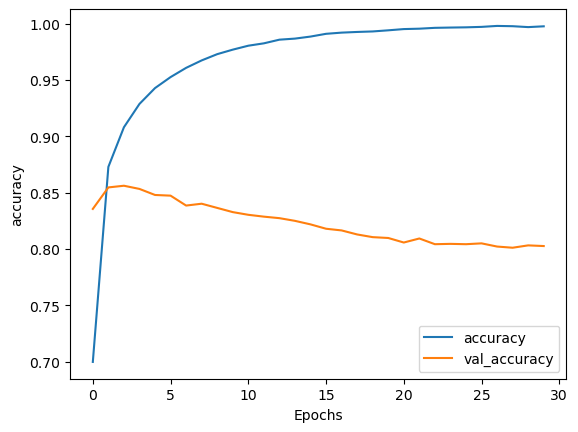

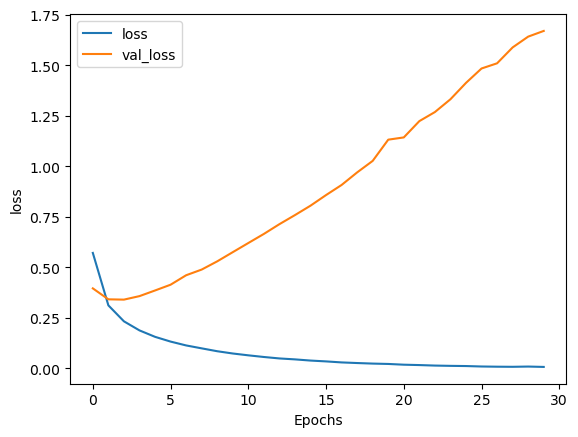

In [ ]:
#visualize the result
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [ ]:
#visualize the word embedding


# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

(10000, 16)


In [ ]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [ ]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')